In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [5]:
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [6]:
# Preprocess the data
# Select relevant features (e.g., 'SALES', 'PRICEEACH')
features = data[['SALES', 'PRICEEACH']]

In [7]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

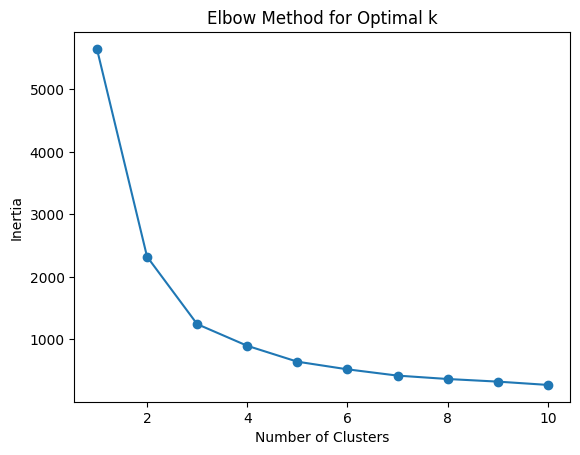

In [9]:
# K-Means Clustering
# Determine the optimal number of clusters (k) using the elbow method or silhouette score
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Cluster 0:
        ORDERNUMBER  QUANTITYORDERED   PRICEEACH  ORDERLINENUMBER  \
count    902.000000       902.000000  902.000000       902.000000   
mean   10258.792683        34.090909   57.418271         6.563193   
std       92.738688         9.285731   12.434138         4.183618   
min    10100.000000        11.000000   26.880000         1.000000   
25%    10178.000000        26.000000   48.980000         3.000000   
50%    10262.000000        33.500000   59.540000         6.000000   
75%    10337.000000        41.750000   67.767500        10.000000   
max    10425.000000        66.000000   81.330000        18.000000   

             SALES      QTR_ID    MONTH_ID      YEAR_ID        MSRP  Cluster  
count   902.000000  902.000000  902.000000   902.000000  902.000000    902.0  
mean   1940.875654    2.716186    7.113082  2003.814856   66.485588      0.0  
std     631.516783    1.203650    3.653175     0.703630   25.681981      0.0  
min     482.130000    1.000000    1.000000  2003.00

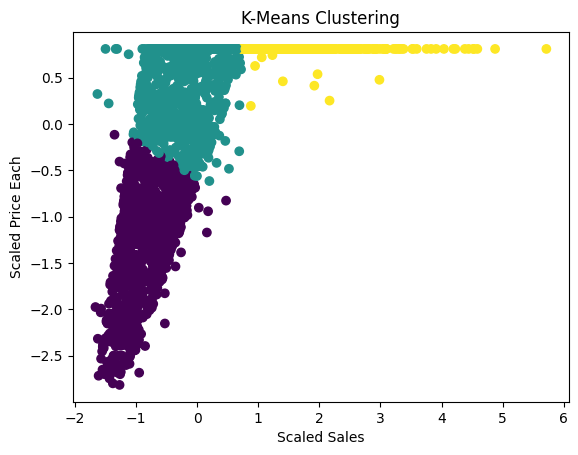

Agglomerative Cluster 0:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   1857.000000      1857.000000  1857.000000      1857.000000   
mean   10256.443188        33.507270    91.718659         6.605816   
std       91.396671         9.162098    11.029640         4.314886   
min    10100.000000         6.000000    60.050000         1.000000   
25%    10177.000000        26.000000    83.320000         3.000000   
50%    10261.000000        33.000000   100.000000         6.000000   
75%    10331.000000        41.000000   100.000000        10.000000   
max    10425.000000        66.000000   100.000000        18.000000   

             SALES       QTR_ID     MONTH_ID      YEAR_ID         MSRP  \
count  1857.000000  1857.000000  1857.000000  1857.000000  1857.000000   
mean   3498.518088     2.732903     7.127625  2003.797523   105.588584   
std    1093.982068     1.206912     3.666657     0.694757    32.038296   
min     541.140000     1.000000     1.000000  20

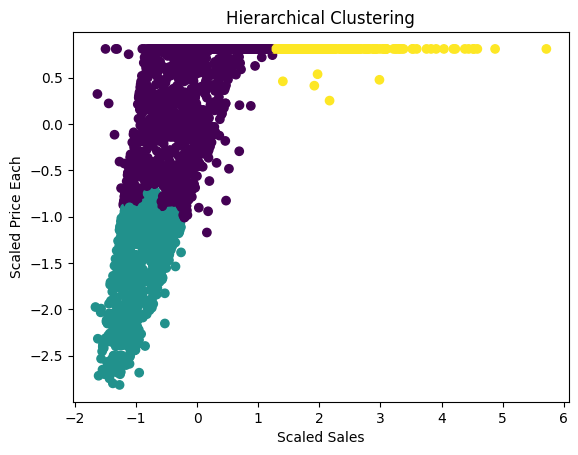

In [10]:
# Choose the optimal k based on the elbow point or silhouette score
k = 3  # Example: Choose 3 clusters

# Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Analyze the clusters
# Add the cluster labels to the original data
data['Cluster'] = labels

# Analyze the characteristics of each cluster
for i in range(k):
  cluster_data = data[data['Cluster'] == i]
  print(f'Cluster {i}:')
  print(cluster_data.describe())

# Visualize the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Scaled Sales')
plt.ylabel('Scaled Price Each')
plt.show()


# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
agg_labels = agg_clustering.fit_predict(scaled_features)

# Analyze the clusters (similar to K-Means)
data['Agglomerative_Cluster'] = agg_labels
for i in range(k):
  cluster_data = data[data['Agglomerative_Cluster'] == i]
  print(f'Agglomerative Cluster {i}:')
  print(cluster_data.describe())

# Visualize the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Scaled Sales')
plt.ylabel('Scaled Price Each')
plt.show()